# Model 2


In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential , regularizers
from tensorflow.python.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam



#----------
from pathlib import Path
import imghdr
import os
from pathlib import Path
import imghdr

img_link=list(Path("../data/").glob(r'**/*.JPG'))

count_num=0
for lnk in img_link:
    binary_img=open(lnk,'rb')
    find_img=tf.compat.as_bytes('JFIF') in binary_img.peek(10)#The JFIF is a JPEG File Interchange Format (JFIF). It is a standard which we gauge if an image is corrupt or substandard
    if not find_img:
        count_num+=1
        os.remove(str(lnk))
print('Total %d pcs image delete from Dataset' % count_num)
#this should help you delete the bad encoded



#------


height,width = 180,180
training_batchSize = 64


train_set = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/train/",
    seed=123,
    image_size=(height,width),
    batch_size=training_batchSize
)
val_set = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/val/",
    seed=123,
    image_size=(height,width),
    batch_size=training_batchSize
)


dnn_model = Sequential()
imported_model = tf.keras.applications.ResNet50(include_top=False,input_shape=(180,180,3),
                                                pooling='avg',classes=10,weights='imagenet')
for layer in imported_model.layers:
    layer.trainable = False
dnn_model.add(imported_model)


dnn_model.add(layers.Flatten())
dnn_model.add(layers.Dense(512, activation='relu'))
dnn_model.add(layers.Dense(4, activation='softmax'))

dnn_model.summary()




Total 0 pcs image delete from Dataset
Found 7222 files belonging to 4 classes.
Found 1805 files belonging to 4 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,638,852 (93.99 MB)

 Trainable params: 1,051,140 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [39]:
dnn_model.compile(optimizer=Adam(learning_rate=0.001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [42]:
history = dnn_model.fit(train_set,validation_data=val_set,epochs=10)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 703ms/step - accuracy: 0.9943 - loss: 0.0164 - val_accuracy: 0.9834 - val_loss: 0.0430
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 83s 730ms/step - accuracy: 0.9984 - loss: 0.0077 - val_accuracy: 0.9911 - val_loss: 0.0240
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 723ms/step - accuracy: 0.9948 - loss: 0.0124 - val_accuracy: 0.9889 - val_loss: 0.0304
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 86s 765ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9906 - val_loss: 0.0261
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 731ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9906 - val_loss: 0.0218
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 85s 753ms/step - accuracy: 1.0000 - loss: 9.1596e-04 - val_accuracy: 0.9911 - val_loss: 0.0198
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 86s 759ms/step - accuracy: 1.0000 - loss: 7.7670e-04 - val_accuracy: 0.9911 - val_loss: 0.0201
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 85s 754ms/step - accuracy: 1.0000 -

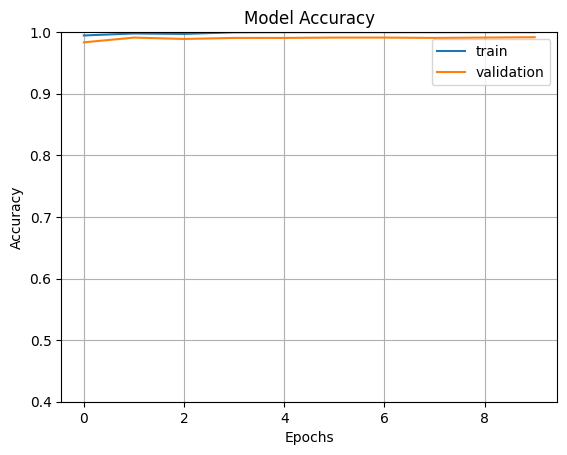

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['train','validation'])
plt.show()

In [44]:
classList = (train_set.class_names)
print(classList)

['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']


# Saving Model


In [45]:
dnn_model.save('model.h5')

# Plotting History 



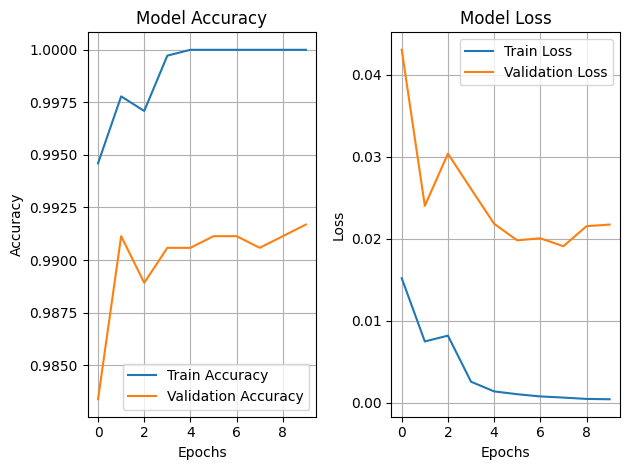

In [49]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Evaluation



In [50]:
loss , accuracy  = dnn_model.evaluate(val_set)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')


29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 620ms/step - accuracy: 0.9938 - loss: 0.0189
Test Accuracy: 0.9917
Test Loss: 0.0217


# Classification Report


In [51]:
from sklearn.metrics import classification_report , confusion_matrix
import numpy as np
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/val/",
    seed=123,
    image_size=(height,width),
    batch_size=training_batchSize,
    shuffle=False
)


y_pred = dnn_model.predict(test_set)
y_pred_classes = np.argmax(y_pred,axis=1)

y_true = np.concatenate([y for x,y in test_set],axis=0)
classLabels = test_set.class_names

print("Classification Report : ")
print(classification_report(y_true,y_pred_classes,target_names=classLabels))



Found 1805 files belonging to 4 classes.
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 601ms/step
Classification Report : 
              precision    recall  f1-score   support

   Black Rot       0.97      1.00      0.98       472
        ESCA       1.00      0.97      0.98       480
     Healthy       1.00      1.00      1.00       423
 Leaf Blight       1.00      1.00      1.00       430

    accuracy                           0.99      1805
   macro avg       0.99      0.99      0.99      1805
weighted avg       0.99      0.99      0.99      1805



2024-11-10 17:56:41.856864: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Confusion Matrix



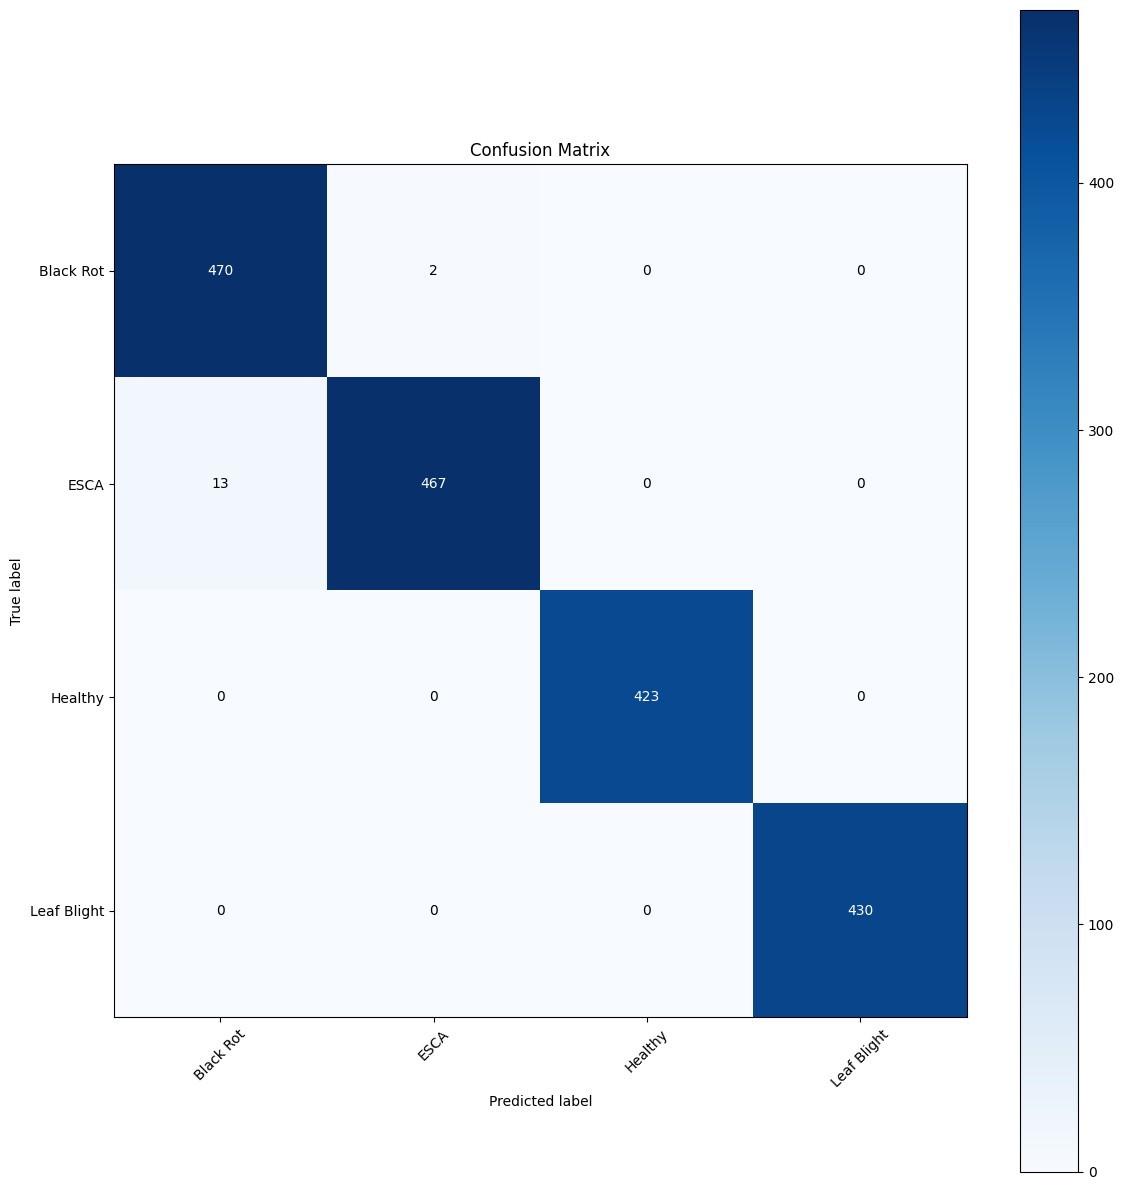

In [52]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
label = classList
# Plot Confusion Matrix
plt.figure(figsize=(12, 12))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label))
plt.xticks(tick_marks, label, rotation=45)
plt.yticks(tick_marks, label)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Sample Prediction





In [53]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = 'esca.jpg'
img = image.load_img(img_path,target_size=(height,width))
img_array  = image.img_to_array(img)


img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)

predictions = dnn_model.predict(img_array)
predicted_class = classList[np.argmax(predictions)]

print(f'Class: {np.argmax(predictions)} : Predicted class index: {predicted_class}')


probabilities = tf.nn.softmax(predictions)
prob = list(probabilities.numpy()[0])
print(prob);


(1, 180, 180, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Class: 1 : Predicted class index: ESCA
[0.17505428, 0.47510877, 0.17491844, 0.17491844]


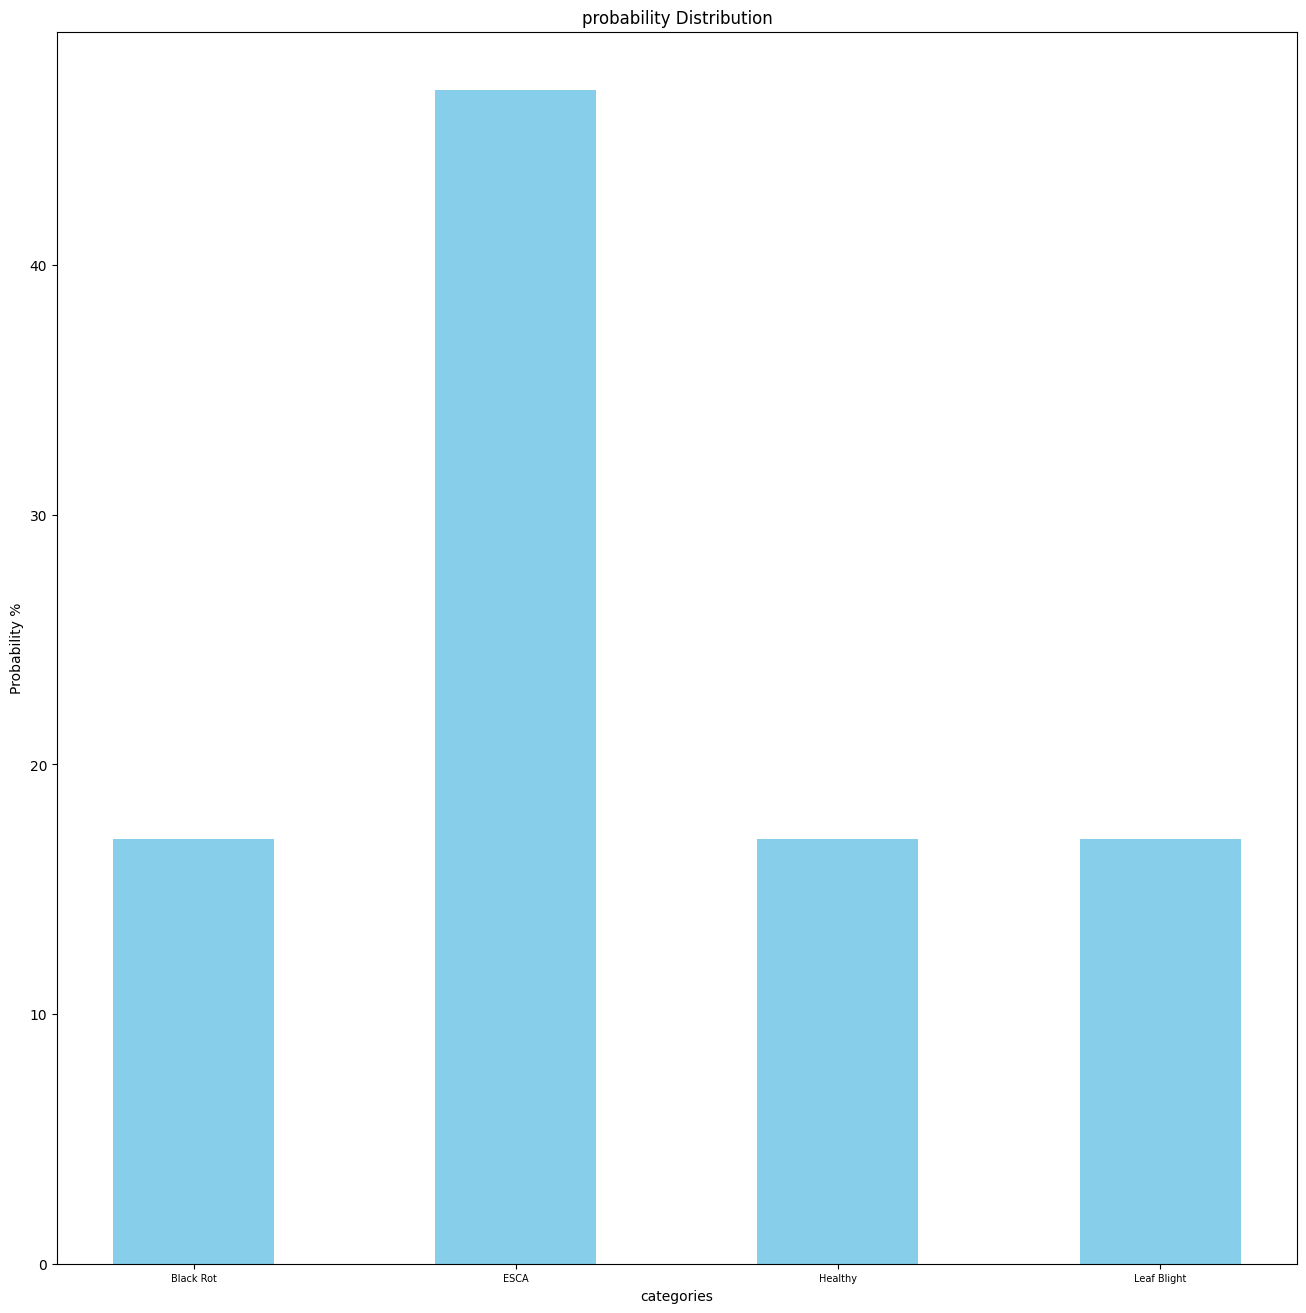

In [54]:
from math import floor
def convert(x):
    return floor(x*100)

probabilityValue = map(convert,prob)
labels = classList
fig , ax = plt.subplots(figsize=(16,16))
ax.bar(labels,list(probabilityValue),color="skyblue",width=0.5)
ax.tick_params(axis="x",labelsize=7)
plt.title("probability Distribution")
plt.xlabel("categories")
plt.ylabel("Probability %")
plt.show()